In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
# number of times two > larvae make contact in a video
# define a contact point
   # certain radius - body segments within 20 pixel of one another?

# iterate over condition 
   # iterate over frames
      # count number of tracks in certain elucidian distance
      # inc body taiil and head in a certain distance - mb just any of these coordinates 
         # append number  

In [ ]:
# just start with body coordinats of animals being in 35 pixels of one another 

In [26]:
# ALL VIDEOS SAME FM AND RESOLUTION 



directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/data/sleap-csv-2024-04-30/developmental-agarose'


contact = []
condition = []

for condition_folder in os.listdir(directory_path):
    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv file
                

                file_path = os.path.join(path, file)
                df = pd.read_csv(file_path)

                total_contacts_per_file = 0

                # Iterate over every frame and identify the number of tracks which are in a certain proximity to one another 
                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')

                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                      # therefore in the matrix there will be 0's in the diagonal values

                    # fill the diagonal values with Nan
                    
                    np.fill_diagonal(distance, np.nan)

                    # count the number of values which are smaller than a certain proximity value 
                    # perform an element wide operation on the matrix for this frame
                    # Create a boolean matrix where True indicates distance is less than 35
                    
                    proximity = distance < 35

                    # also remember the matrix will reflect down the diagonal - so want to ignore half the values also 
                    # syemtric so divide by two 

                    contact_per_frame = np.nansum(proximity) / 2

                    total_contacts_per_file += contact_per_frame

                contact.append(total_contacts_per_file)
                condition.append(condition_folder)





df_contact = pd.DataFrame({'condition': condition, 'total contacts': contact})       


df_contact



,condition,total contacts
0,day4-n2,79.0
1,day4-n2,45.0
2,day4-n2,61.0
3,day5-n10,1220.0
4,day5-n10,1319.0
5,day5-n10,1275.0
6,day5-n10,1000.0
7,day5-n10,1525.0
8,day5-n10,979.0
9,day5-n10,963.0


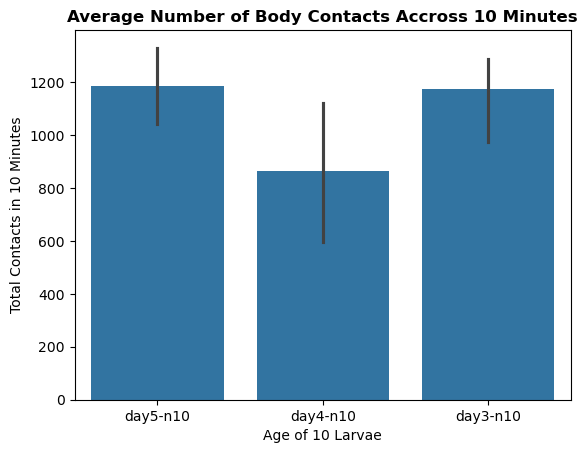

In [27]:
# dont forget this is out of 6000 frames 
# 35 pixels proximity of body coordinates 

df_10 = df_contact[df_contact['condition'].str.contains('n10')]

sns.barplot(data=df_10, x='condition', y='total contacts')

plt.title('Average Number of Body Contacts Accross 10 Minutes', fontweight='bold')

plt.xlabel('Age of 10 Larvae')
plt.ylabel('Total Contacts in 10 Minutes')

plt.show()

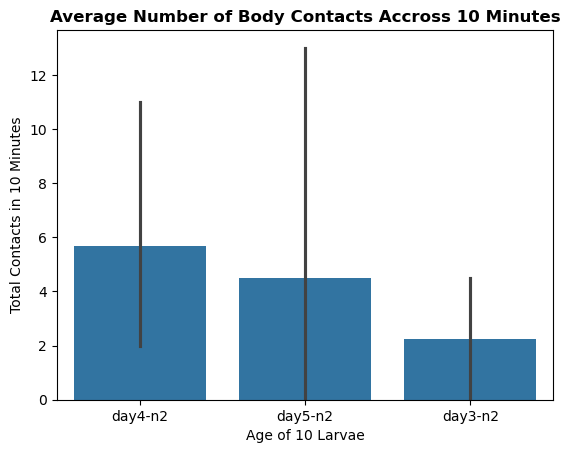

In [16]:
df_10 = df_contact[df_contact['condition'].str.contains('n2')]

sns.barplot(data=df_10, x='condition', y='total contacts')

plt.title('Average Number of Body Contacts Accross 10 Minutes', fontweight='bold')

plt.xlabel('Age of 10 Larvae')
plt.ylabel('Total Contacts in 10 Minutes')

plt.show()

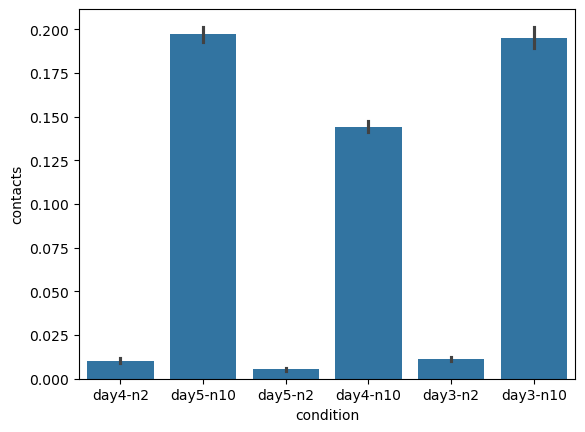

In [8]:
# average currently contacts per frame 

sns.barplot(data=df_contact, x='condition', y='contacts')
plt.show()

In [20]:
# ALL VIDEOS SAME FM AND RESOLUTION 



directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/data/sleap-csv-2024-04-30/food1%-agarose'


contact = []
condition = []

for condition_folder in os.listdir(directory_path):
    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv file
                

                file_path = os.path.join(path, file)
                df = pd.read_csv(file_path)

                total_contacts_per_file = 0

                # Iterate over every frame and identify the number of tracks which are in a certain proximity to one another 
                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')

                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                      # therefore in the matrix there will be 0's in the diagonal values

                    # fill the diagonal values with Nan
                    
                    np.fill_diagonal(distance, np.nan)

                    # count the number of values which are smaller than a certain proximity value 
                    # perform an element wide operation on the matrix for this frame
                    # Create a boolean matrix where True indicates distance is less than 35
                    
                    proximity = distance < 35

                    # also remember the matrix will reflect down the diagonal - so want to ignore half the values also 
                    # syemtric so divide by two 

                    contact_per_frame = np.nansum(proximity) / 2

                    total_contacts_per_file += contact_per_frame

                contact.append(total_contacts_per_file)
                condition.append(condition_folder)





df_contact = pd.DataFrame({'condition': condition, 'total contacts': contact})       


df_contact



,condition,total contacts
0,day4-n10-agarose,1220.0
1,day4-n10-agarose,1230.0
2,day4-n10-agarose,1346.0
3,day4-n10-agarose,1065.0
4,day4-n10-agarose,740.0
5,day4-n10-agarose,251.0
6,day4-n10-agarose,654.0
7,day4-n10-agarose,412.0
8,day4-n10-food,1093.0
9,day4-n10-food,831.0


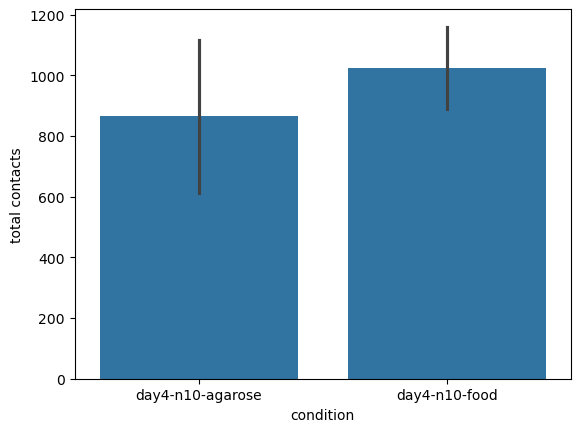

In [21]:
# 35 pixels between body parts

sns.barplot(data=df_contact, x= 'condition', y='total contacts')

plt.show()

In [39]:
# ALL VIDEOS SAME FM AND RESOLUTION 



directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/data/sleap-csv-2024-04-30/food2%-food1%'


contact = []
condition = []

for condition_folder in os.listdir(directory_path):
    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv file
                

                file_path = os.path.join(path, file)
                df = pd.read_csv(file_path)

                total_contacts_per_file = 0

                # Iterate over every frame and identify the number of tracks which are in a certain proximity to one another 
                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')

                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                      # therefore in the matrix there will be 0's in the diagonal values

                    # fill the diagonal values with Nan
                    
                    np.fill_diagonal(distance, np.nan)

                    # count the number of values which are smaller than a certain proximity value 
                    # perform an element wide operation on the matrix for this frame
                    # Create a boolean matrix where True indicates distance is less than 35
                    
                    proximity = distance < 35

                    # also remember the matrix will reflect down the diagonal - so want to ignore half the values also 
                    # syemtric so divide by two 

                    contact_per_frame = np.nansum(proximity) / 2

                    total_contacts_per_file += contact_per_frame

                contact.append(total_contacts_per_file)
                condition.append(condition_folder)





df_contact = pd.DataFrame({'condition': condition, 'total contacts': contact})       


df_contact



,condition,total contacts
0,day4-n10-food1%,1093.0
1,day4-n10-food1%,831.0
2,day4-n10-food1%,879.0
3,day4-n10-food1%,1424.0
4,day4-n10-food1%,915.0
5,day4-n10-food1%,1301.0
6,day4-n10-food1%,883.0
7,day4-n10-food1%,756.0
8,day4-n10-food1%,879.0
9,day4-n10-food1%,1268.0


In [41]:
df_contact

,condition,total contacts
0,day4-n10-food1%,1093.0
1,day4-n10-food1%,831.0
2,day4-n10-food1%,879.0
3,day4-n10-food1%,1424.0
4,day4-n10-food1%,915.0
5,day4-n10-food1%,1301.0
6,day4-n10-food1%,883.0
7,day4-n10-food1%,756.0
8,day4-n10-food1%,879.0
9,day4-n10-food1%,1268.0


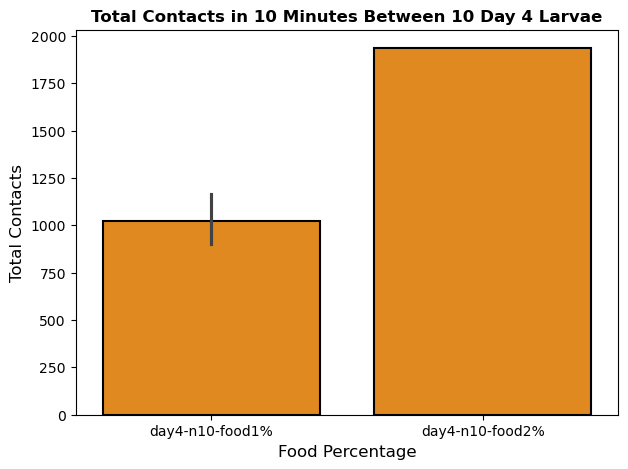

In [61]:

plt.figure(figsize=(7, 5))

sns.barplot(data=df_contact, x='condition', y='total contacts',  color='darkorange',  # Light orange color using HEX code
    edgecolor='black',  # Color of the edge or line around the bars
    linewidth=1.5 )

plt.title('Total Contacts in 10 Minutes Between 10 Day 4 Larvae', fontweight='bold')



plt.xlabel('Food Percentage', fontsize=12)
plt.ylabel('Total Contacts', fontsize=12)


plt.show()

In [24]:
# ALL VIDEOS SAME FM AND RESOLUTION 



directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/data/sleap-csv-2024-04-30/agarose-wiii8-rh6-kir2.1'


contact = []
condition = []

for condition_folder in os.listdir(directory_path):
    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv file
                

                file_path = os.path.join(path, file)
                df = pd.read_csv(file_path)

                total_contacts_per_file = 0

                # Iterate over every frame and identify the number of tracks which are in a certain proximity to one another 
                for frame in df['frame_idx'].unique():
            
                    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
                    # cdist function requires two 2-dimensional array-like objects as inputs
                    # create an array of the coordinates for that specific frame

                    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

                    # The cdist function computes the distance between every pair of points in the two arrays passed to it.

                    distance = cdist(body_coordinates, body_coordinates, 'euclidean')

                    # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
                      # therefore in the matrix there will be 0's in the diagonal values

                    # fill the diagonal values with Nan
                    
                    np.fill_diagonal(distance, np.nan)

                    # count the number of values which are smaller than a certain proximity value 
                    # perform an element wide operation on the matrix for this frame
                    # Create a boolean matrix where True indicates distance is less than 35
                    
                    proximity = distance < 35

                    # also remember the matrix will reflect down the diagonal - so want to ignore half the values also 
                    # syemtric so divide by two 

                    contact_per_frame = np.nansum(proximity) / 2

                    total_contacts_per_file += contact_per_frame

                contact.append(total_contacts_per_file)
                condition.append(condition_folder)





df_contact = pd.DataFrame({'condition': condition, 'total contacts': contact})       


df_contact



,condition,total contacts
0,day4-n10-rh6,931.0
1,day4-n10-rh6,556.0
2,day4-n10-rh6,623.0
3,day4-n10-rh6,1445.0
4,day4-n10-rh6,457.0
5,day4-n2-rh6,18.0
6,day4-n2-rh6,0.0
7,day4-n2-rh6,0.0
8,day4-n2-rh6,102.0
9,day4-n2-rh6,24.0


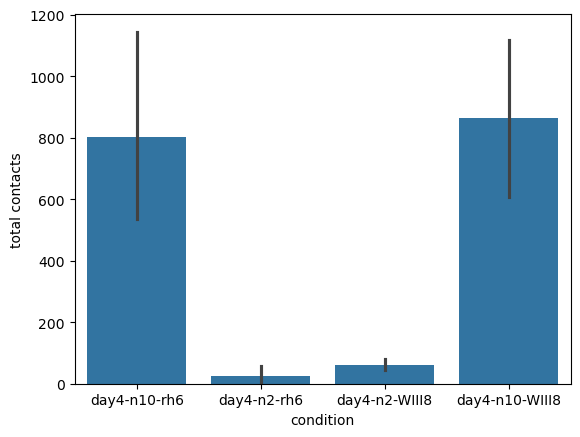

In [25]:
sns.barplot(data=df_contact, x= 'condition', y='total contacts')

plt.show()